# $$ Deep \: Learning \: and \: Machine \: Intelligence $$
# $$ Task \: 2 $$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Callable, Any, List
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
car_data = pd.read_csv('CarPrice.csv')
target_column = 'price'
DataFrame = pd.core.frame.DataFrame

## $$Phase\:One:\:Explore\: Data$$

### Overall structure

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
car_data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
car_data.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

### Missing Value

In [6]:
def missing_value_percentage(df: DataFrame) -> None:
  missing_percentage = (df.isnull().sum() / len(df)) * 100

  print("Percentage of missing values in each column:")
  print(missing_percentage)


In [7]:
missing_value_percentage(car_data)

Percentage of missing values in each column:
car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


### Visualaze data 

In [8]:
def plot_numberical_columns(df: DataFrame, target_column: str) -> Callable[..., Any]:
  column_types = df.drop(columns=[target_column]).dtypes
  numberical_columns = column_types[column_types != 'object'].index
  ncols = 3
  total_plots = len(numberical_columns) - 1
  nrows = (total_plots + ncols - 1) // ncols

  _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
  
  axes = axes.ravel() 

  for i, ax in enumerate(axes):
    if i >= total_plots: break
    if numberical_columns[i] == target_column: continue
    ax.scatter(df[numberical_columns[i]], df[target_column])
    ax.set_title(numberical_columns[i])

  plt.tight_layout()
  
  return numberical_columns


def draw_correlation_matrix(df: DataFrame) -> DataFrame:
  corr_matrix = df.corr()
  high_corr_features = corr_matrix[abs(corr_matrix[target_column]) > 0.5][target_column].index
  
  plt.figure(figsize=(16, 14))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

  plt.title('Correlation Matrix')

  plt.show()
  
  return high_corr_features.drop(target_column)



def visualize_relationships(df: pd.DataFrame, target_column: str, numberical_columns: List[str]) -> None:
  for column in numberical_columns:
    plt.figure(figsize=(8, 6))
    sns.jointplot(data=df, x=column, y=target_column, kind="hex")
    plt.subplots_adjust(top=0.9)
    plt.suptitle(f"{column} vs. {target_column}")
    plt.show()



def plot_categorical_columns(df: DataFrame, target_column: str) -> Callable[..., Any]:
  column_types = df.drop(columns=[target_column]).dtypes
  categorical_columns = column_types[column_types == 'object'].index
  ncols = 3
  total_plots = len(categorical_columns)-1
  nrows = (total_plots + ncols - 1) // ncols

  _, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
  
  axes = axes.ravel() 

  for i, ax in enumerate(axes):
    if i >= total_plots: break
    sns.boxenplot(x=categorical_columns[i+1], y=target_column, data=df, ax=ax)
    ax.set_title(categorical_columns[i+1])

  plt.tight_layout()
  
  return categorical_columns

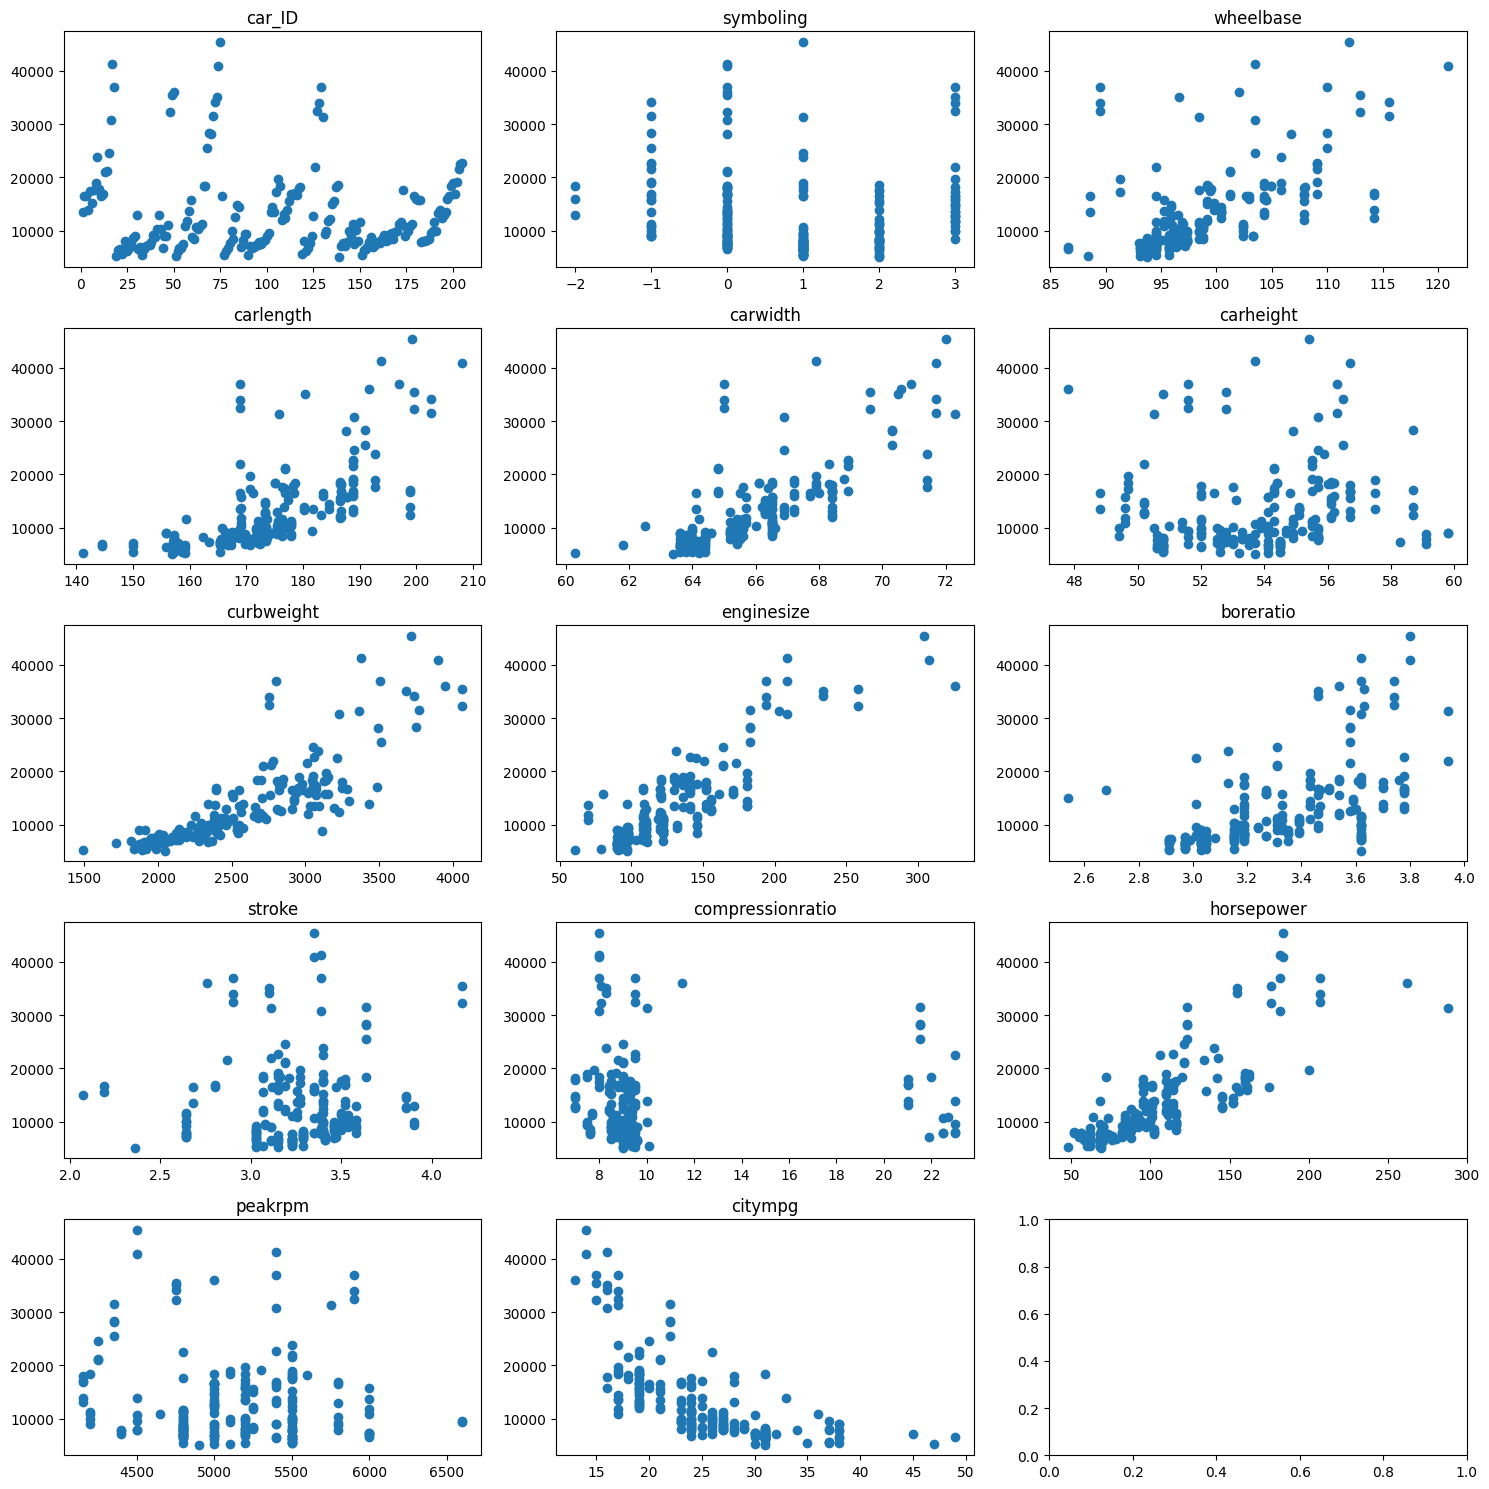

In [9]:
numberical_columns = plot_numberical_columns(car_data, target_column)

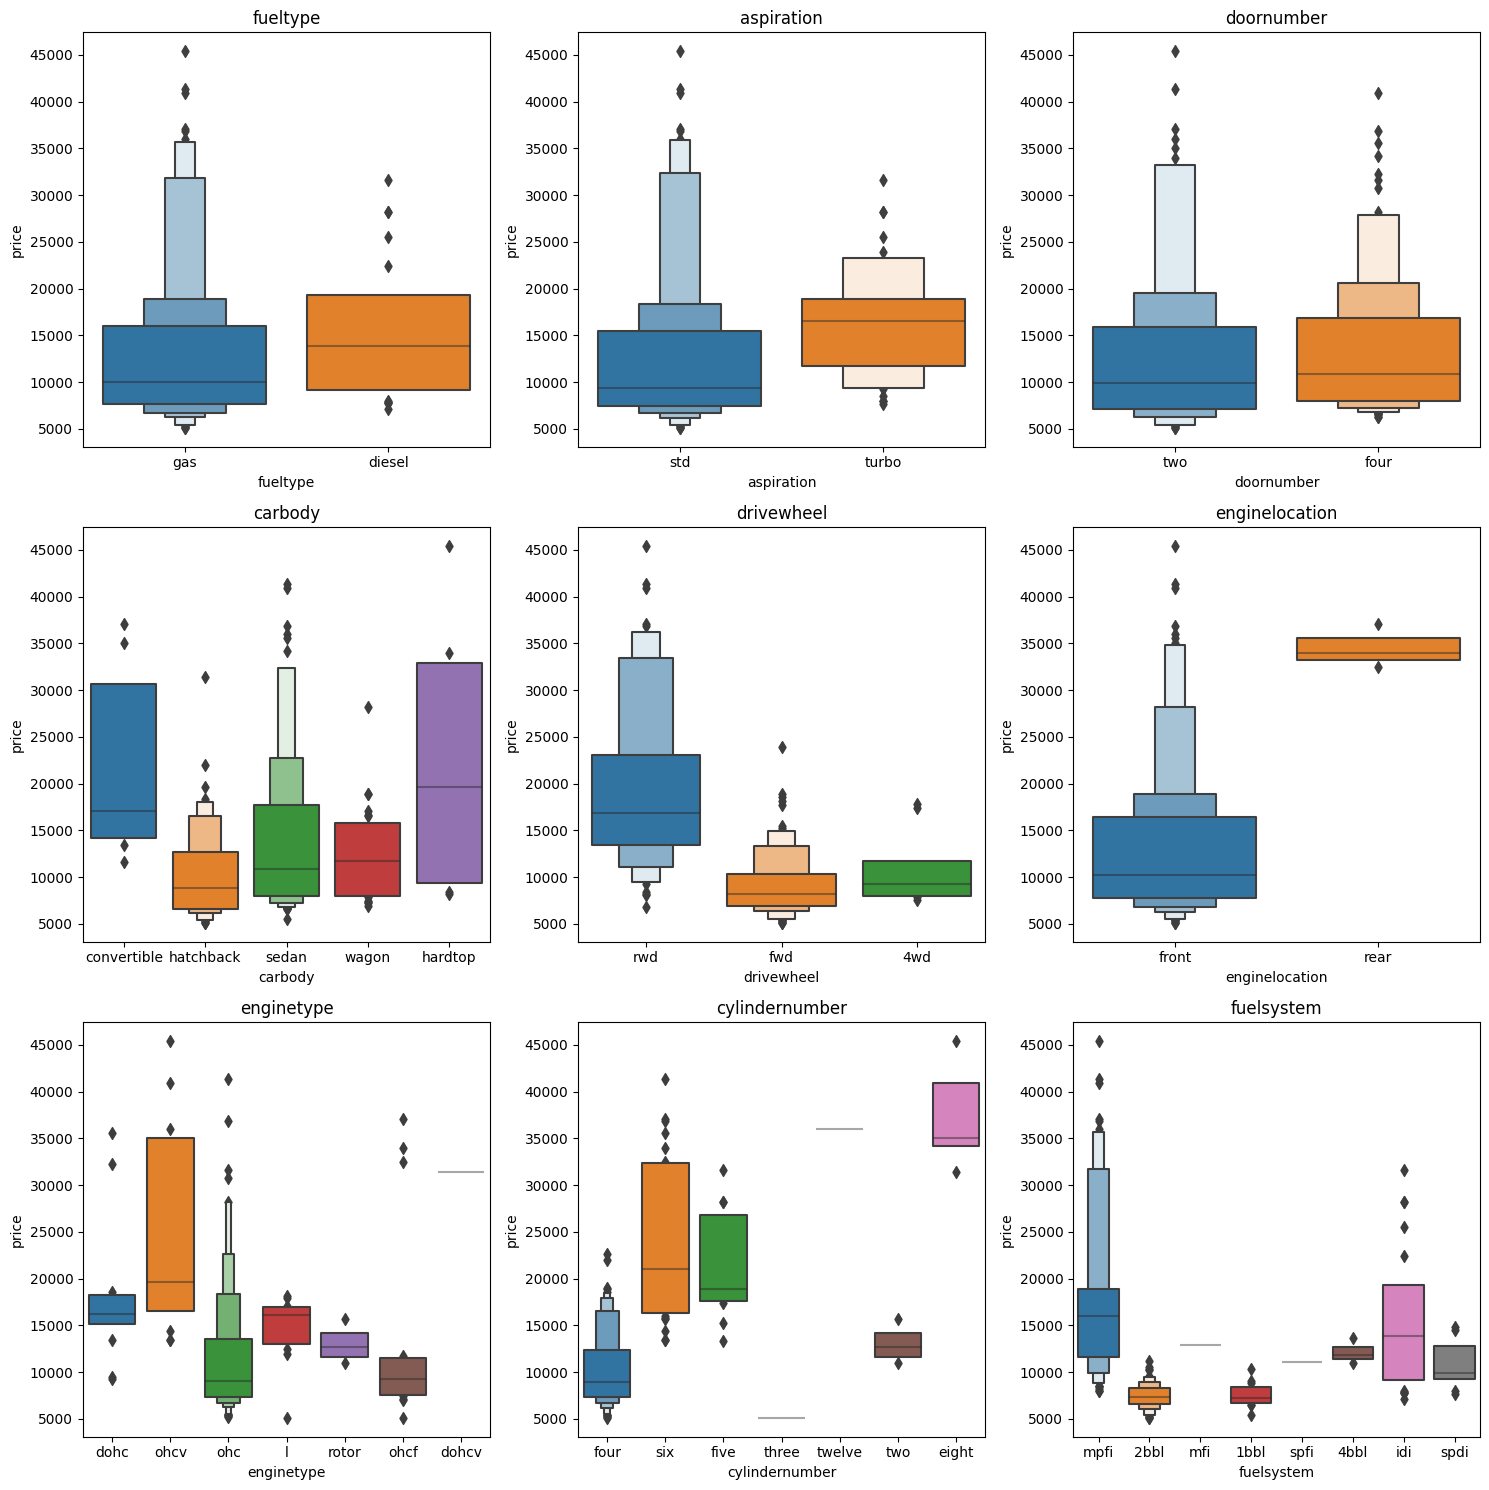

In [10]:
categorical_columns = plot_categorical_columns(car_data, target_column)

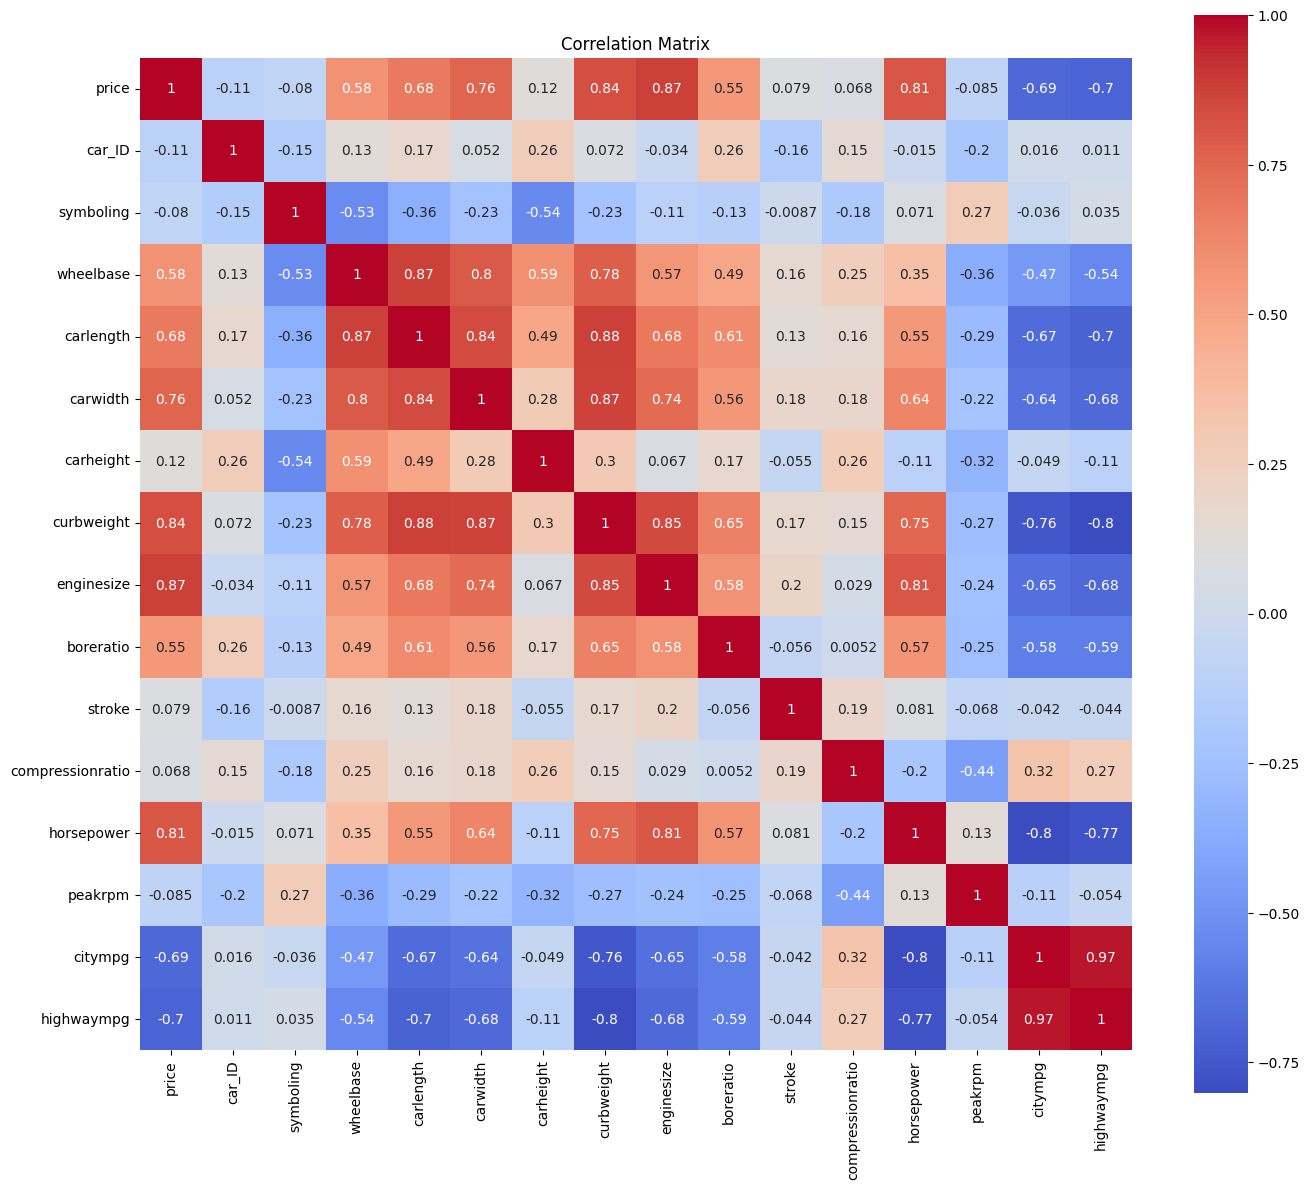

In [11]:
high_corr_features = draw_correlation_matrix(car_data[numberical_columns.insert(0, target_column)])

In [12]:
unnecessary_columns = ['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel']

<Figure size 800x600 with 0 Axes>

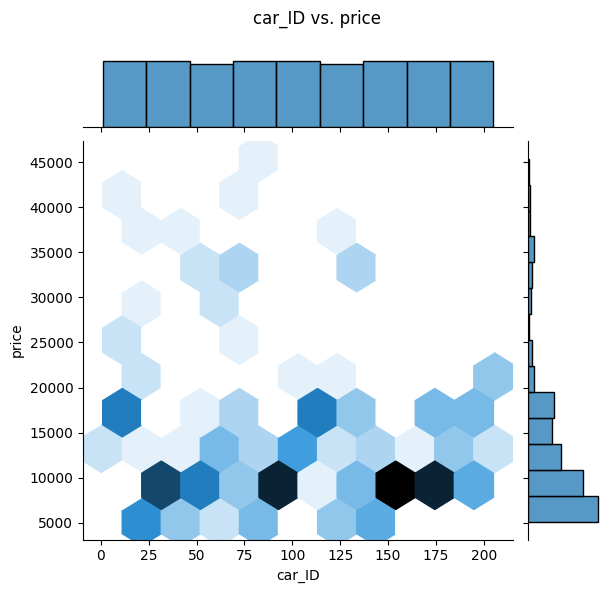

<Figure size 800x600 with 0 Axes>

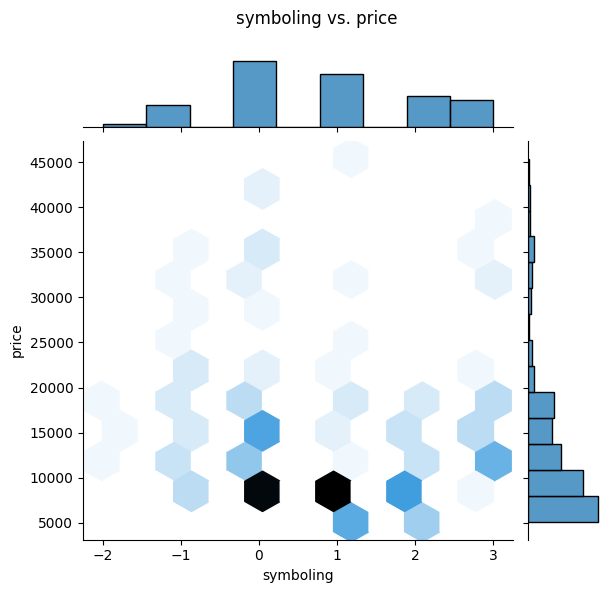

<Figure size 800x600 with 0 Axes>

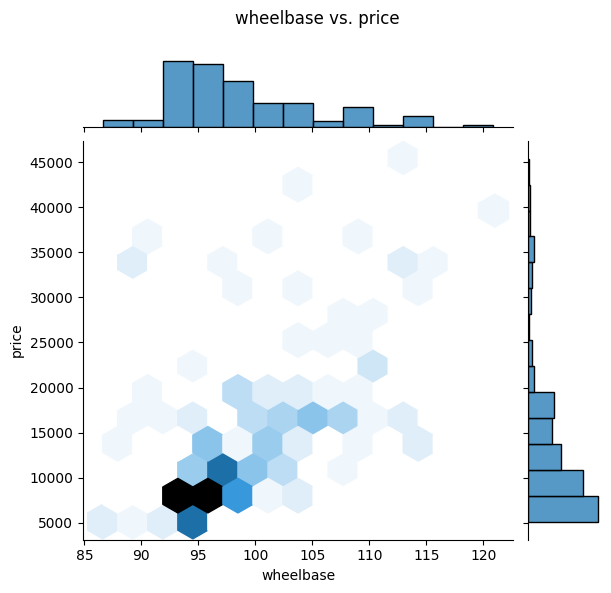

<Figure size 800x600 with 0 Axes>

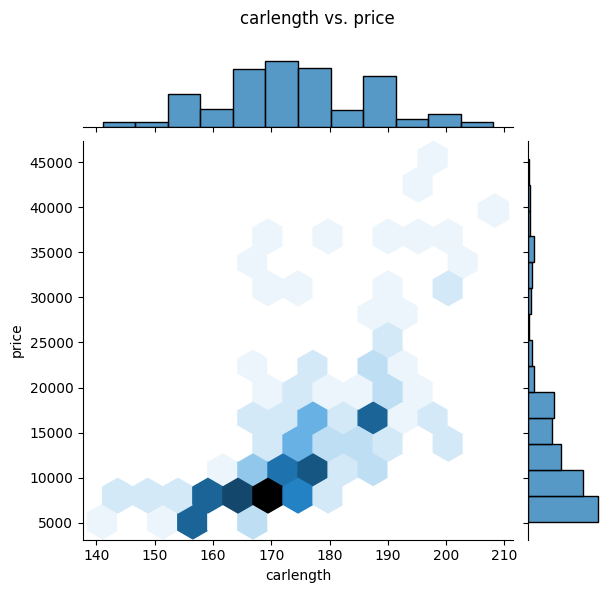

<Figure size 800x600 with 0 Axes>

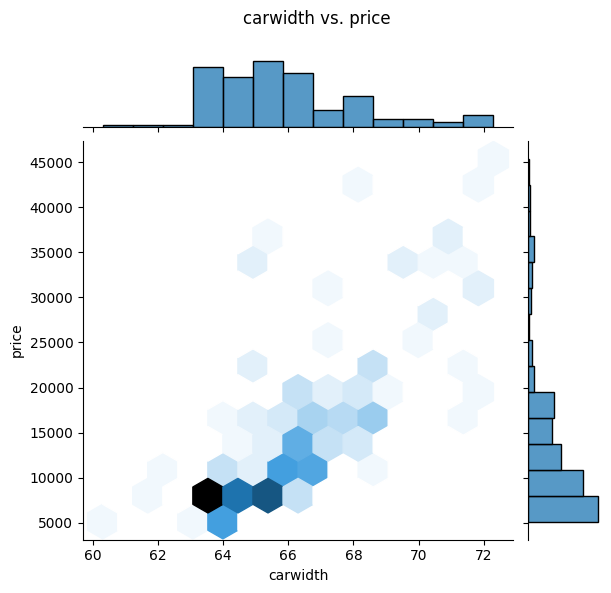

<Figure size 800x600 with 0 Axes>

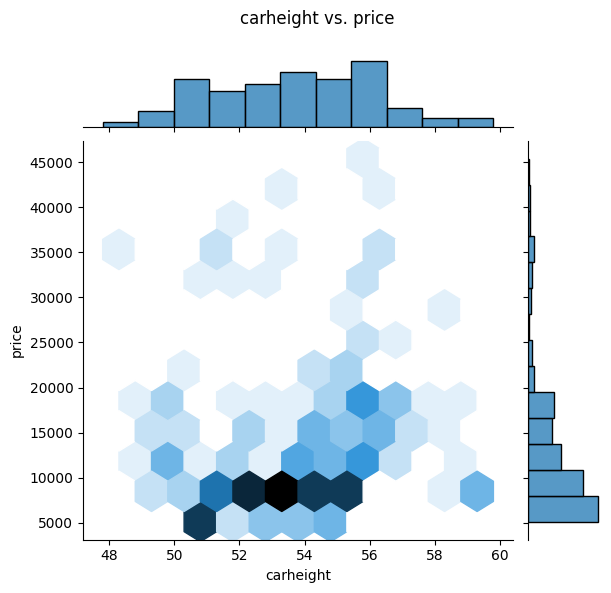

<Figure size 800x600 with 0 Axes>

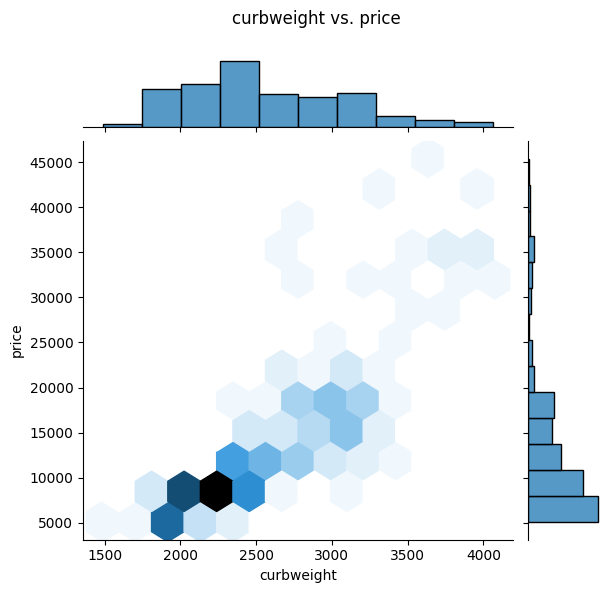

<Figure size 800x600 with 0 Axes>

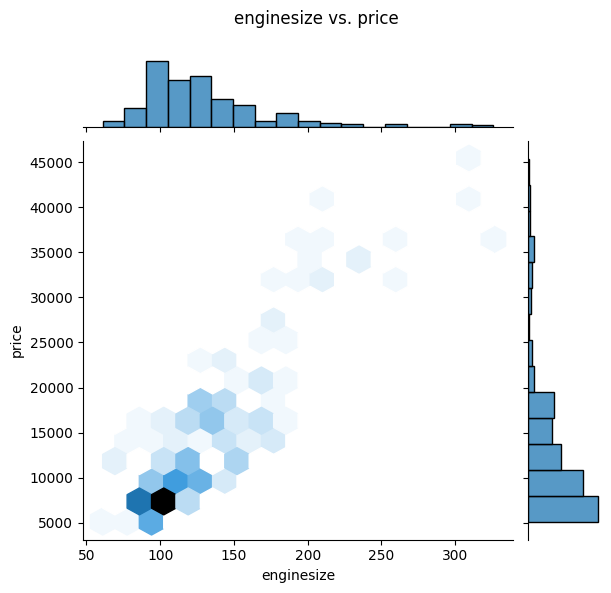

<Figure size 800x600 with 0 Axes>

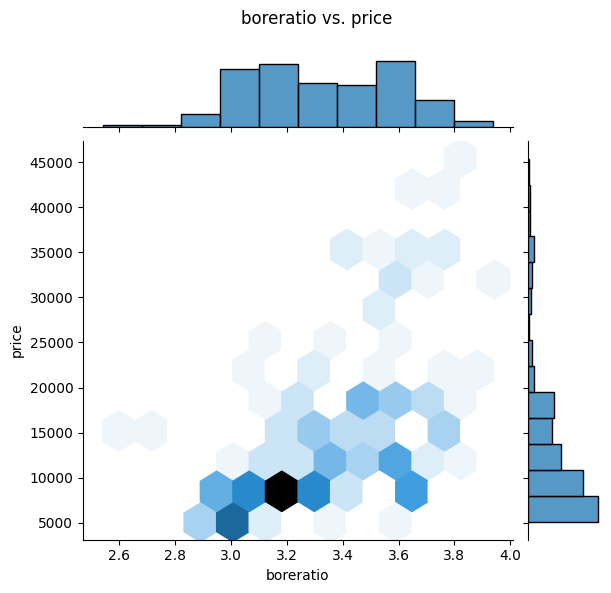

<Figure size 800x600 with 0 Axes>

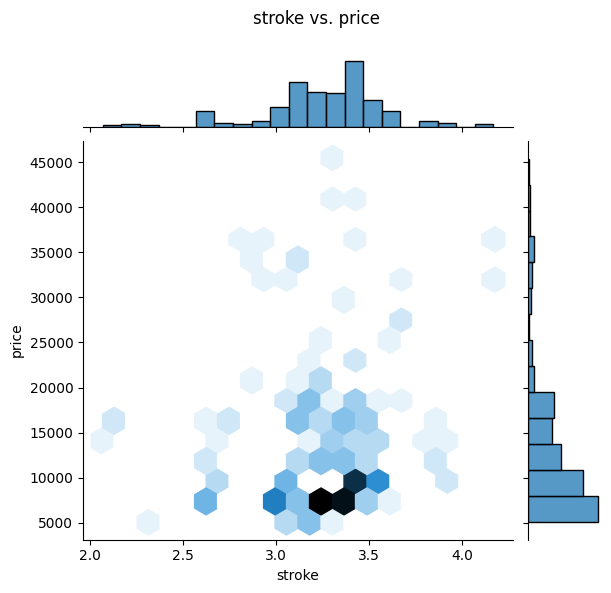

<Figure size 800x600 with 0 Axes>

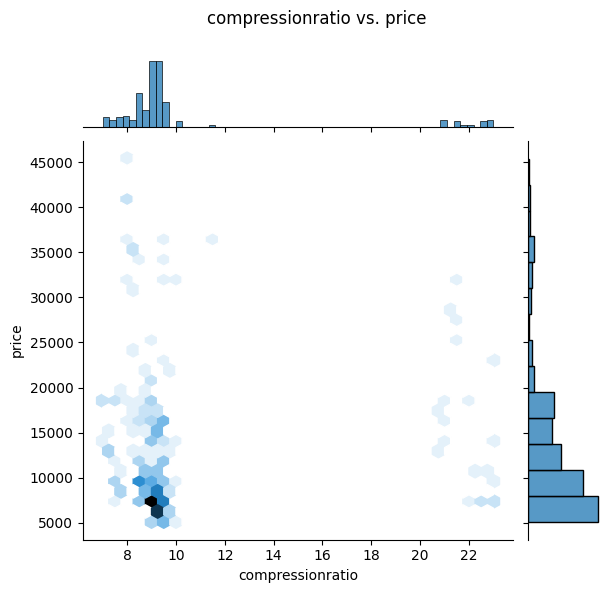

<Figure size 800x600 with 0 Axes>

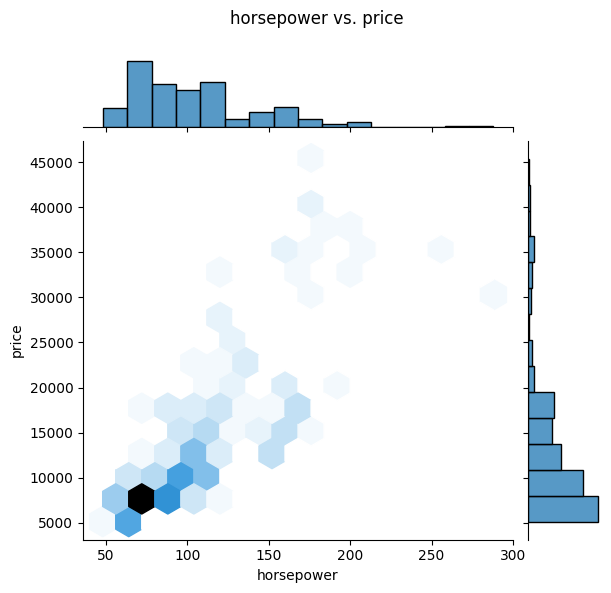

<Figure size 800x600 with 0 Axes>

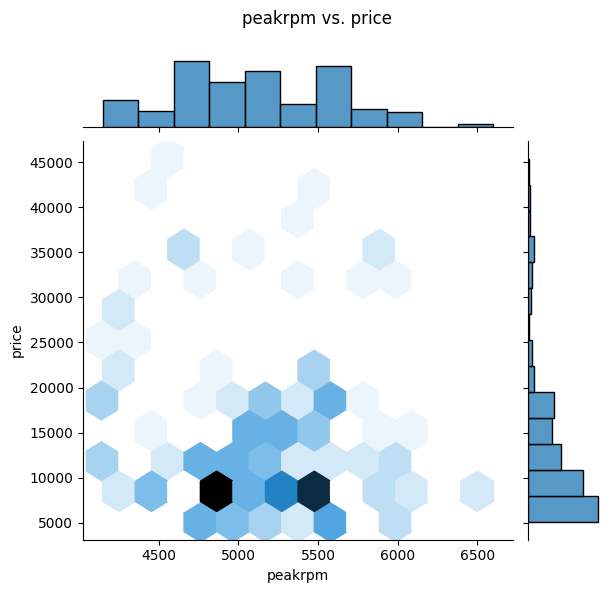

<Figure size 800x600 with 0 Axes>

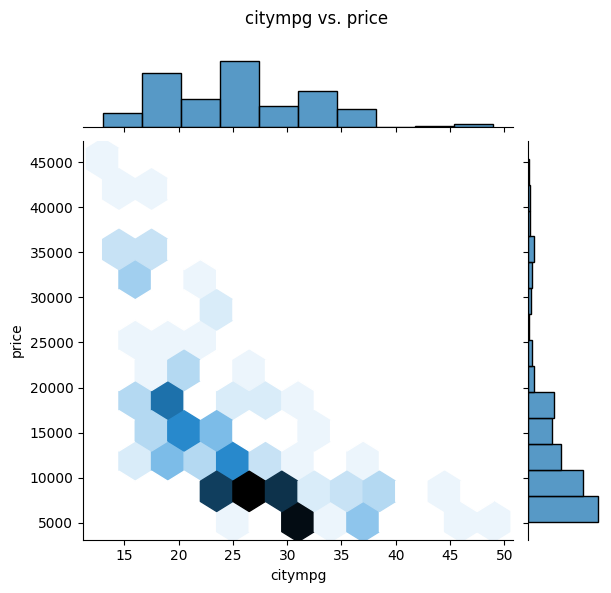

<Figure size 800x600 with 0 Axes>

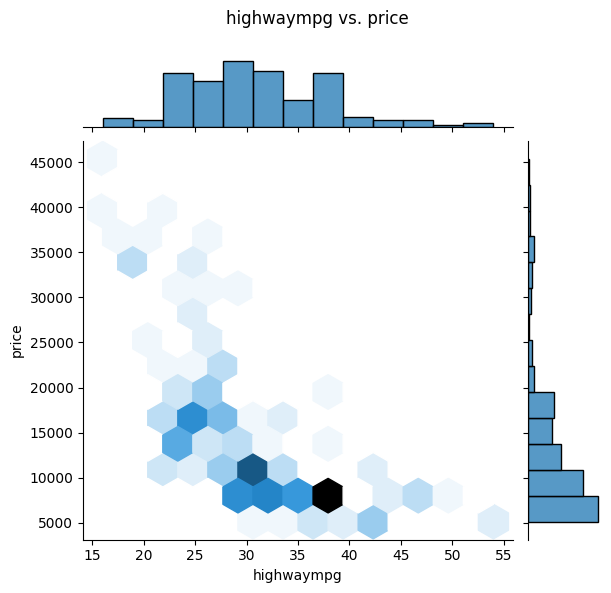

In [13]:
visualize_relationships(car_data, target_column, numberical_columns)

## $$Phase\:Two:\:Preprocessing\: Data$$

### Handling categorical variables

There are two common approaches for handling categorical variables: ordinal encoding and one-hot encoding.

1. Ordinal Encoding:

   - Ordinal encoding assigns a unique numerical value to each category of the categorical variable based on the specified order or priority.
   - This encoding preserves the ordinal relationship between categories, assuming that there is a meaningful order or hierarchy among the categories.
   - Ordinal encoding can be implemented using label encoding techniques provided by libraries like scikit-learn.

1. One-Hot Encoding:

   - One-hot encoding represents each category of a categorical variable as a binary (0 or 1) feature.
   - It creates separate binary columns for each category and sets the corresponding column value to 1 for the category that is present, while all other columns remain 0.
   - This encoding is useful when there is no inherent order or hierarchy among the categories, and each category is treated as independent.
   - One-hot encoding can be performed using techniques such as the `OneHotEncoder` class in scikit-learn.

The choice between ordinal encoding and one-hot encoding depends on the nature of the categorical variable and the specific requirements of the machine learning algorithm. If there is a meaningful order among categories, ordinal encoding can be beneficial. On the other hand, if categories are unordered or have no inherent hierarchy, one-hot encoding is typically the preferred approach to avoid introducing unintended relationships or assumptions in the data.

In [14]:
def preprocessing(data: DataFrame, target: str=None, drop_cols: List[str]=None, return_type: str=None) -> DataFrame:
    
    '''
            Perform preprocessing on a DataFrame.

            Args:
                    df (DataFrame): Input DataFrame.
                    target (str): Name of the target column.
                    drop_cols (List[str]): List of columns to drop.
                    return_type (str): Desired return type ('DataFrame' or 'array').

            Returns:
                    DataFrame or ndarray: Transformed data based on the return_type specified.
    '''
    
    clear_data = data.drop(columns=drop_cols)
    clear_data = clear_data.drop(columns=target)

    column_types = clear_data.dtypes
    categorical_columns = column_types[column_types == 'object'].index
    numberical_columns = column_types[column_types != 'object'].index

    cat_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('one_hot', OneHotEncoder(sparse_output=False))
    ])

    num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
    ])

    full_pipeline = ColumnTransformer([
            ("categorical", cat_pipeline, categorical_columns),
            ("numberical", num_pipeline, numberical_columns),
    ])

    transformed_data = full_pipeline.fit_transform(clear_data)

    updated_cat_columns = full_pipeline.named_transformers_['categorical']['one_hot'].get_feature_names_out(categorical_columns)
    column_names = list(updated_cat_columns) + list(numberical_columns)

    if return_type == 'DataFrame': 
        return pd.DataFrame(transformed_data, columns=column_names)
    elif return_type == 'array' or return_type == None: 
        return np.asarray(transformed_data)
    else: 
        raise ValueError("Invalid return_type. Please choose 'DataFrame' or 'array'.")


In [15]:
prepared_data = preprocessing(data=car_data, drop_cols=unnecessary_columns, target=target_column, return_type='array')

In this case, with around 200 samples, we could consider a 70:30 split, resulting in approximately 140 samples for training and 60 samples for testing.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(prepared_data, car_data[target_column], test_size=0.3, random_state=42)

## $$Phase\:Three:\:Model\: Training\: and\: Evaluation$$

### Linear Regression

Main form of simple linear regression function: 
$$f(x) = \alpha x + \beta$$

The model gets the best regression fit line by finding the best $\alpha$ and $\beta$ values. 

$\alpha$ : intercept

$\beta$: slope

$$ \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$ 
$$ \hat{\beta} = \hat{y} - \hat{\alpha} \hat{x}$$

In linear regression, the objective is to determine the optimal values of $\alpha$ and $\beta$ that accurately represent the data. To achieve this, the method of least squares is employed, which entails minimizing the sum of the squared deviations between the predicted and actual values of the dependent variable.

The simplest linear model for regression is one that involves a linear combination of the input variables

$$y(\textbf{x}, \textbf{w})=w_0+w_1x_1+w_2x_2+w_3x_3+...+w_Nx_N$$

Where $\textbf{x} = (x_1,...,x_N)^T$. This is often simply known as linear regression. The key
property of this model is that it is a linear function of the parameters $w_0,...,w_N$.

$$ y(\textbf{x}, \textbf{w})=\textbf{w}^T\textbf{x}$$

We assume that the target variable $t$ is given by a deterministic function $y(\textbf{x}, \textbf{w})$ with additive Gaussian noise so that 
$$t = y(\textbf{x}, \textbf{w}) + \epsilon$$

Where $\epsilon$ is a zero mean Gaussian random variable with precision (inverse variance) $\beta$. Thus we can write 
$$p(t|\textbf{x}, \textbf{w}, \beta ) = \mathcal{N} (t|y(\textbf{x}, \textbf{w}), \beta^{-1})$$

Now consider a data set of inputs $X = {\textbf{x}_1,..., \textbf{x}_N }$ with corresponding target
values $t_1,...,t_N$ . We group the target variables $\left \{ t_n \right \}$ into a column vector that we denote by $\textbf{t}$

We obtain the following expression for the likelihood function, which is a function of the adjustable
parameters $\textbf{w}$ and $\beta$, in the form
$$p(\textbf{t}|X, \textbf{w}, \beta) = \prod_{n=1}^{N}\mathcal{N}(t_n|\textbf{w}^T\textbf{x}_n, \beta^{-1})$$

Taking the logarithm of the likelihood function, and making use of the following for the univariate Gaussian, we have
$$ln \:p(\textbf{t}|X, \textbf{w}, \beta) = \sum_{n=1}^{N}ln \:\mathcal{N}(t_n|\textbf{w}^T\textbf{x}_n, \beta^{-1})$$

The gradient of the log likelihood function takes the form
$$\nabla ln \:p(\textbf{t}|X, \textbf{w}, \beta) = \sum_{n=1}^{N}\left \{ t_n - \textbf{w}^T\textbf{x}_n \right \}\textbf{x}_n^{T}$$

Setting this gradient to zero gives
$$ 0 = \sum_{n=1}^{N} t_n\textbf{x}_n^{T} - \textbf{w}^T\left ( \sum_{n=1}^{N} \textbf{x}_n\textbf{x}_n^{T} \right )$$

Solving for $\textbf{w}$ we obtain
$$\textbf{w}_{ML} = (X^{T}X)^{-1}X^{T}\textbf{t}$$


In [17]:
def linear_regression(X: np.ndarray, T: np.ndarray) -> np.ndarray:

  '''  
      Perform linear regression using the pseudo-inverse method.

      Args:
          X (np.ndarray): Input feature matrix of shape (n_samples, n_features).
          y (np.ndarray): Target variable vector of shape (n_samples,).

      Returns:
          np.ndarray: Weight vector representing the coefficients of the linear regression model.

      Raises:
          ValueError: If the shapes of X and y are incompatible.
  '''

  assert X.ndim == 2, "X must be a 2-dimensional array."
  assert T.ndim == 1, "y must be a 1-dimensional array."
  assert X.shape[0] == T.shape[0], "Number of samples in X and y must be equal."

  ones_column = np.ones((X.shape[0], 1))
  X = np.column_stack((ones_column, X))
  X_pinv = np.linalg.pinv(X)
  W = np.dot(X_pinv, T)

  return W


def get_predictions(X: np.ndarray, W: np.ndarray) -> np.ndarray:
    
  '''
      Predict the values of the given data matrix

      Args:
          X (np.ndarray): Input feature matrix of shape (n_samples, n_features).
          W (np.ndarray): Weight vector representing the coefficients of the linear regression model of shape (n_weight,).

      Returns:
          np.ndarray: Y vector representing the prediction for the X.

      Raises:
          ValueError: If the shapes of X and W are incompatible.
  '''
    
  assert X.ndim == 2, "X must be a 2-dimensional array."
  assert W.ndim == 1, "W must be a 1-dimensional array."
  assert X.shape[1]+1 == W.shape[0], "Number of samples in X and W must be equal."

  ones_column = np.ones((X.shape[0], 1))
  X = np.column_stack((ones_column, X))
  Y = np.dot(X, W)

  return Y

### Train and predict

In [18]:
W = linear_regression(X_train, y_train)
y_pred = get_predictions(X_test, W)

### Evaluation

When evaluating the accuracy and effectiveness of a regression model's predicted values compared to the actual test labels, there are several evaluation metrics to consider. Here are two commonly used options:

- **Coefficient of Determination (R-squared)**: $R^2$ is a metric that measures the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in the regression model. It provides an indication of how well the model fits the data. $R^2$ ranges from 0 to 1, with higher values indicating a better fit. $R^2$ is calculated as: 
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$ 
where $n$ is the number of samples, $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, and $\bar{y}$ is the mean of the actual values. $R^2$ squared can provide insights into how well the model captures the variation in the data, with higher values indicating a better fit.

- **Root Mean Squared Error (RMSE)**: Root Mean Squared Error is another commonly used evaluation metric for regression models, which is derived from Mean Squared Error. $RMSE$ represents the square root of the average squared difference between the predicted and actual values. It provides a measure of the average magnitude of the model's prediction errors. $RMSE$ is particularly useful because it is in the same unit as the target variable, making it more interpretable and easier to compare with the original scale of the data. The formula for RMSE is as follows:
$$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $$
where $n$ is the number of samples, $y_i$ is the actual value, and $\hat{y}_i$ is the predicted value for the $i$-th sample.

In [19]:
def compute_score(y_true, y_pred):
    return {
        "R2": f"{r2_score(y_true, y_pred):.3f}",
        "RMSE": f"{mean_squared_error(y_true, y_pred, squared=False):.3f}",
    }

In [20]:
evl = compute_score(y_test, y_pred)

In [21]:
print(f"mean of y_test: {y_test.mean():.3f}")
print(f"maximum of y_test: {y_test.max()}")
print(f"miniimum of y_test: {y_test.min()}\n")
print(f"Evaluation: \n {evl}")


mean of y_test: 12972.737
maximum of y_test: 41315.0
miniimum of y_test: 5151.0

Evaluation: 
 {'R2': '0.873', 'RMSE': '2967.691'}


Based on the provided evaluation metrics and the context of the problem, the model appears to perform well. Let's analyze the information:

The $R^2$ value of **0.873** indicates that the model can explain approximately **87.3%** of the variance in the target variable (car prices). A higher $R^2$ value suggests a better fit of the model to the data, indicating that the model captures a significant portion of the variability in car prices.

The $RMSE$ value of **2967.691** represents the average magnitude of the prediction errors.Considering the range of the target variable:

- The minimum value of `y_test` is **5151.0**.
- The maximum value of `y_test` is **41315.0**.

Comparing the $RMSE$ value **2967.691** to the range of `y_test`:

- The $RMSE$ is smaller than the range of `y_test`, indicating that the average prediction error is smaller than the overall range of car prices.

Based on these observations, the model can be considered good, as it demonstrates a high $R^2$ value (**87.3%** explained variance) and the $RMSE$ is smaller than the range of the target variable. However, it is important to note that the assessment of model performance also depends on the specific requirements and context of the task. It is advisable to consider additional factors, such as domain knowledge and the practical significance of the errors, to make a more comprehensive evaluation.